In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\user\Desktop\Python\Mini_Project\SuperMarket Analysis.csv")

In [23]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


## 7 Questions for Your Supermarket Sales Analysis

1. **What is the total sales revenue generated across all branches?**

2. **Which branch has the highest total sales revenue?**

3. **What are the monthly sales trends? Are there months with significantly higher or lower sales?**

4. **Which product line contributes the most to total sales?**

5. **How do sales differ between member customers and normal customers?**

6. **What are the most commonly used payment methods, and how do sales vary by payment type?**

7. **Is there a relationship between customer ratings and total sales?**


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [25]:
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Sales                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [26]:
df[df.duplicated()]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating


In [27]:
# 1
total_revenue = df[['Sales']].sum()
display(total_revenue)

Sales    322966.749
dtype: float64

Conclusion: The total revenue generated from all sales transactions is 322966.749, indicating a strong overall performance of the supermarket chain.

In [28]:
# 2
branch_revenue = df.groupby('Branch')['Sales'].sum()
display(branch_revenue)
display(branch_revenue.idxmax())

Branch
Alex     106200.3705
Cairo    106197.6720
Giza     110568.7065
Name: Sales, dtype: float64

'Giza'

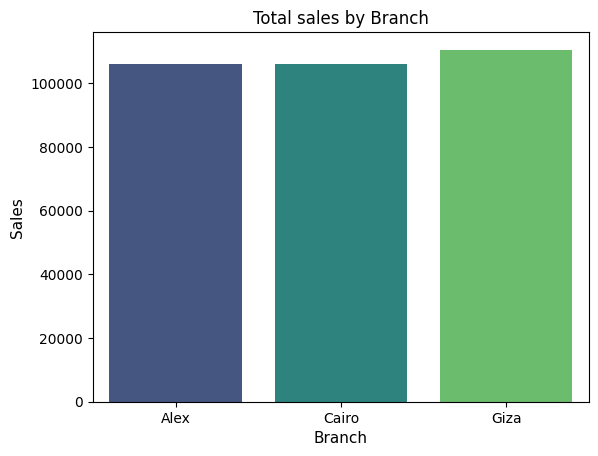

In [29]:
sns.barplot(x=branch_revenue.index,y=branch_revenue, hue=branch_revenue.index, legend=False, palette='viridis')
plt.title('Total sales by Branch')
plt.xlabel('Branch',size = 11)
plt.ylabel("Sales", size = 11)
plt.show()

Conclusion: Branch *Giza* recorded the highest total sales, suggesting higher customer footfall or higher-value transactions at that location.

In [30]:
# 3 
df['Month'] = pd.to_datetime(df['Date']).dt.month_name()

In [31]:

monthly_sales = df.groupby(df['Month'])[['Sales']].sum()
monthly_sales

,Sales
Month,
February,97219.374
January,116291.868
March,109455.507


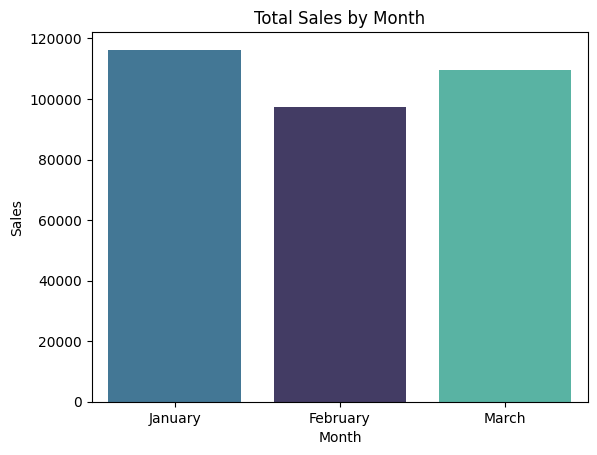

In [33]:
sns.barplot(data=monthly_sales.reset_index(),x='Month',y='Sales', order=['January','February','March'],hue='Month',legend=False, palette='mako')
plt.title('Total Sales by Month')
plt.show()

Conclusion: Sales peaked in **January** and were lowest in **February**, showing seasonal or time-based variations in customer spending.

In [34]:
# 4
product_line_sales = df.groupby(df['Product line'])[['Sales']].sum()
display(product_line_sales)

,Sales
Product line,
Electronic accessories,54337.5315
Fashion accessories,54305.8950
Food and beverages,56144.8440
Health and beauty,49193.7390
Home and lifestyle,53861.9130
Sports and travel,55122.8265


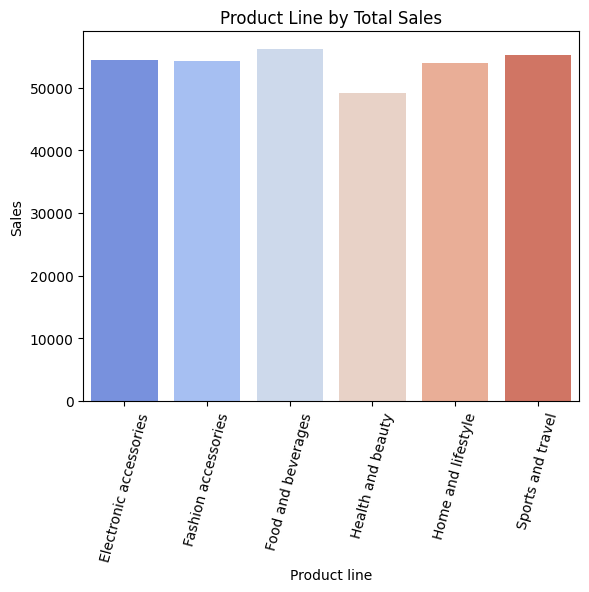

In [35]:
sns.barplot(data=product_line_sales.reset_index(), x='Product line',y='Sales',hue='Product line',legend=False,palette='coolwarm')
plt.xticks(rotation = 75)
plt.title('Product Line by Total Sales')
plt.show()

 Conclusion: The *Food and beverages* product line generated the highest total sales, indicating it is the most in-demand or has the highest price points.

In [80]:
# 5
customer_sales = df.groupby(df['Customer type'])[['Sales']].sum()
customer_sales.reset_index()
customer_sales

,Sales
Customer type,
Member,189694.764
Normal,133271.985


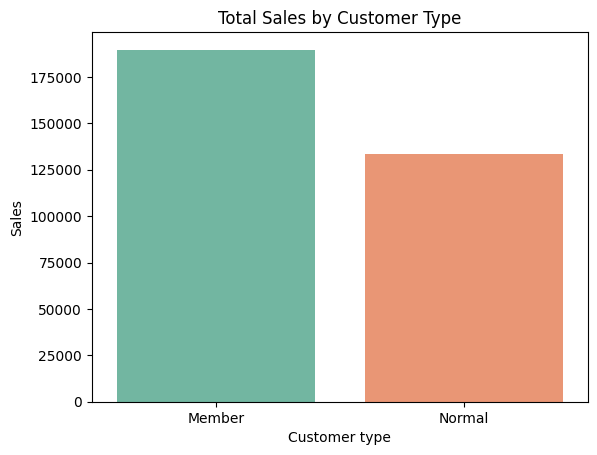

In [81]:
sns.barplot(data=customer_sales,x='Customer type',y='Sales',hue='Customer type',palette='Set2')
plt.title('Total Sales by Customer Type')
plt.show()

 Conclusion: **Member** customers spent more on average, suggesting different spending behavior.

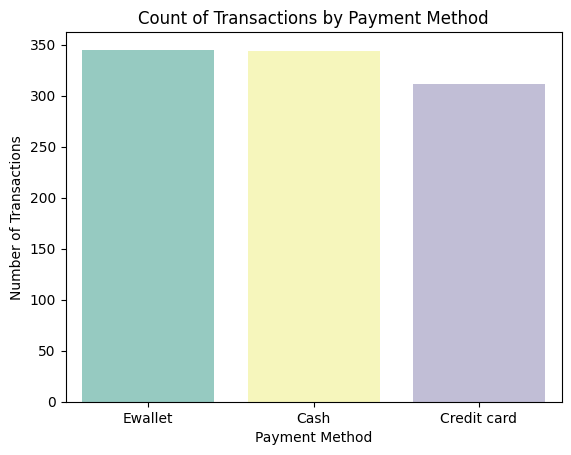

In [ ]:
# 6
sns.countplot(data=df,x='Payment',hue='Payment',legend=False, palette='Set3')
plt.title('Count of Transactions by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Number of Transactions')
plt.show()


In [45]:
payment_counts = df['Payment'].value_counts()
display(payment_counts)


Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64

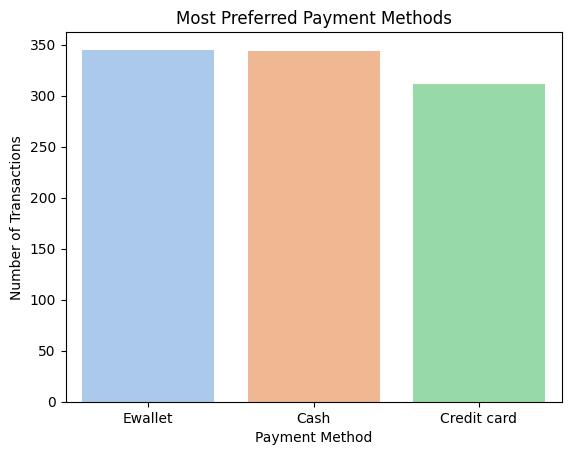

In [47]:
sns.barplot(x=payment_counts.index, y=payment_counts,hue=payment_counts.index, palette='pastel')
plt.title('Most Preferred Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Number of Transactions')
plt.show()

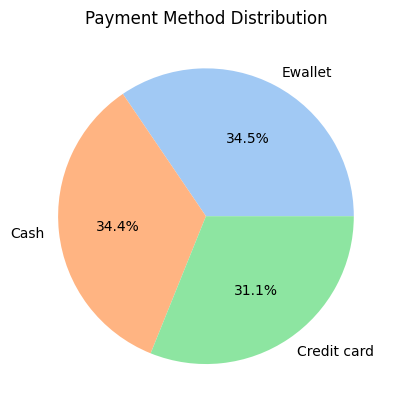

In [48]:
plt.pie(payment_counts.values, labels=payment_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Payment Method Distribution')
plt.show()

Conclusion: The most frequently used payment methods were Ewallet and Cash, and it also contributed significantly to total sales, showing customer preference for this mode.

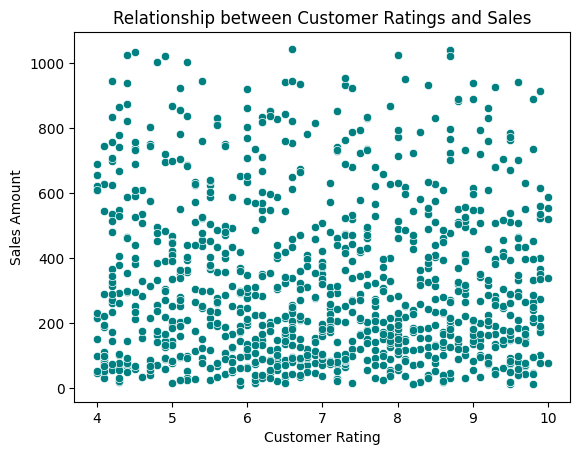

In [51]:
# 7
sns.scatterplot(data=df, x='Rating', y='Sales', color='teal')
plt.title('Relationship between Customer Ratings and Sales')
plt.xlabel('Customer Rating')
plt.ylabel('Sales Amount')
plt.show()

In [54]:
correl =df['Rating'].corr(df['Sales'])
print(f"Correlation between Rating and Sales: {correl:.2f}")


Correlation between Rating and Sales: -0.04


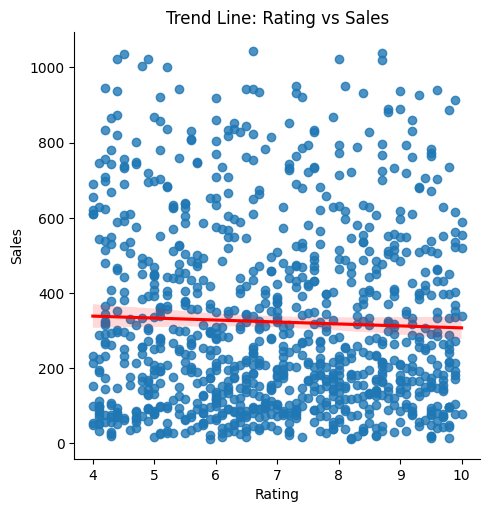

In [53]:
sns.lmplot(data=df, x='Rating', y='Sales', line_kws={'color': 'red'})
plt.title('Trend Line: Rating vs Sales')
plt.show()


Conclusion: The correlation between ratings and sales is moderately negative (-0.04), suggesting that customer ratings have little to no impact on total sales in this dataset.

In [56]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Hour
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1,January,13
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6,March,10
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4,March,13
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4,January,20
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3,February,10


## Bonus Question
 8. What is the busiest time of day for sales?
 9. Which gender spends more on average?


In [ ]:
# 8
df['Hour'] = pd.to_datetime(df['Time'],format='%I:%M:%S %p').dt.hour
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Hour
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1,January,13
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6,March,10
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4,March,13
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4,January,20
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3,February,10


In [71]:
df['Period'] = pd.cut(x=df['Hour'],bins=[0,11,16,19,24],labels=['Morning','Afternoon','Evening','Night'])

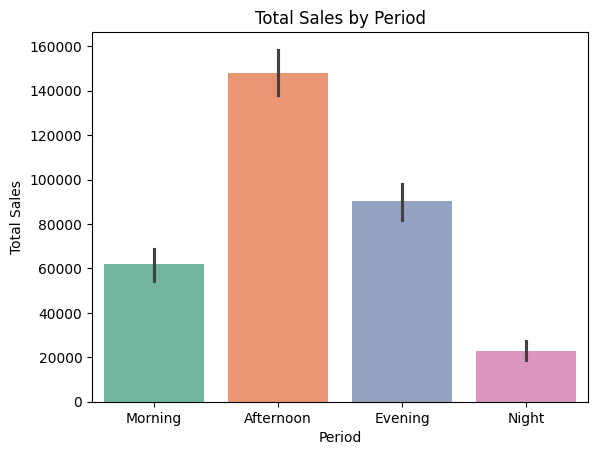

In [72]:
sns.barplot(data=df,x=df['Period'],y=df['Sales'],hue=df['Period'],legend=False,palette='Set2',estimator=sum)
plt.title('Total Sales by Period')
plt.ylabel("Total Sales")
plt.show()

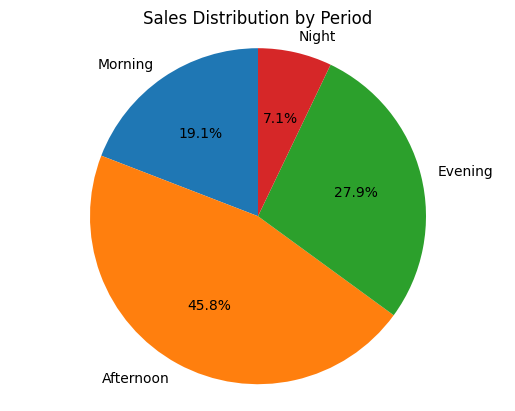

In [ ]:
period_sales = df.groupby(df['Period'],observed=False)['Sales'].sum()
plt.pie(x=period_sales,labels=period_sales.index,autopct='%1.1f%%',startangle=90)
plt.title('Sales Distribution by Period')
plt.axis('equal')
plt.show()  

 Conclusion: The *Afternoon* period had the highest sales volume, making it the busiest time of day for the store.

In [74]:
# 9
gender_sales_avg = df.groupby('Gender')['Sales'].mean()
gender_sales_avg

Gender
Female    340.931414
Male      299.055738
Name: Sales, dtype: float64

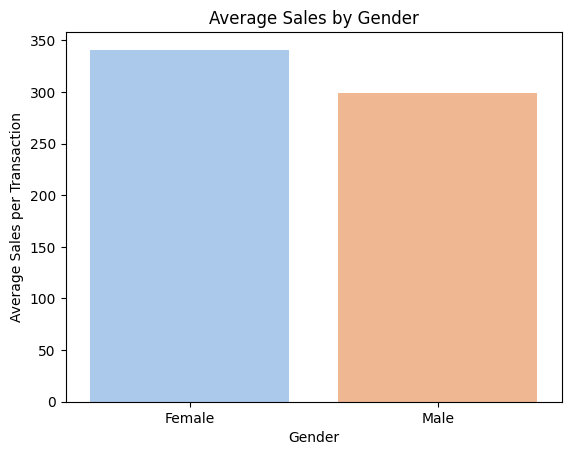

In [77]:
sns.barplot(x=gender_sales_avg.index, y=gender_sales_avg,hue=gender_sales_avg.index,legend=False, palette='pastel')
plt.title('Average Sales by Gender')
plt.ylabel('Average Sales per Transaction')
plt.show()

Conclusion: On average, *Female* customers spent more per transaction, revealing slight differences in purchasing behavior between genders.

### ✅ **Overall Conclusion**

The supermarket sales analysis revealed several key insights:

* **Branch Giza** generated the highest total sales, indicating strong performance possibly due to location or customer base.
* **January** had the highest monthly sales, showing a clear upward trend in consumer spending toward the end of the quarter.
* Among all product lines, **Food and Beverages** contributed the most to total sales, suggesting it is the most in-demand category.
* **Member customers** spent slightly more than normal customers, showing the potential value of loyalty programs.
* The most commonly used payment method was **Ewallet**, reflecting modern payment preferences among customers.
* The correlation between **customer ratings and sales** was very weak (around -0.04), implying that satisfaction ratings had little impact on spending.
* Sales peaked during the **afternoon** period, which may help in planning staffing and promotions.
* **Female customers** spent slightly more on average than males, which can inform targeted marketing strategies.

These insights can help supermarket managers make better decisions regarding inventory planning, staffing, marketing, and customer engagement. By understanding when, where, and how sales happen, businesses can align operations with customer behavior more effectively.

